# Quickview
This notebook can be used to quickly view STWIN acquisitions.

1. the first step is selecting the acquisition folder using the widget below.

In [1]:
from ipyfilechooser import FileChooser

sensor_name = "ISM330DHCX"
subsensor = "ACC"

fc = FileChooser('datalogs')
display(fc)

FileChooser(path='/home/melpignano/eai-polimi/datalogs', filename='', title='', show_hidden=False, select_desc…

In [2]:
import warnings
warnings.filterwarnings("ignore")
from HSD.HSDatalog import HSDatalog
import matplotlib.pyplot as plt
import numpy as np
acq_folder = fc.selected_path
hsd = HSDatalog(acq_folder)
df = hsd.get_dataframe('ISM330DHCX','ACC',sample_start=0,sample_end=-1)
acc = df[['A_x [g]','A_y [g]','A_z [g]']]
z = acc['A_z [g]'].to_numpy()
z = z - np.mean(z)
y = acc['A_y [g]'].to_numpy()
y = y - np.mean(y)
x = acc['A_x [g]'].to_numpy()
x = x - np.mean(x)
sr = 6667

sensor = hsd.get_sensor(sensor_name)
s_descriptor_list = sensor.sensor_descriptor.sub_sensor_descriptor
s_status_list = sensor.sensor_status.sub_sensor_status
for i, s in enumerate(s_descriptor_list):
    print(f" --> {s.sensor_type} - ODR: {s_status_list[i].odr} , FS: {s_status_list[i].fs} , SamplesPerTs {s_status_list[i].samples_per_ts}")


 --> ACC - ODR: 6667.0 , FS: 2.0 , SamplesPerTs 1000
 --> GYRO - ODR: 6667.0 , FS: 4000.0 , SamplesPerTs 1000
 --> MLC - ODR: 0.0 , FS: 0.0 , SamplesPerTs 1


2. run the cell below to visualize a slider and select the frequency range we are interested in

In [3]:
import ipywidgets as widgets
range = widgets.IntRangeSlider(
    value=[0, 200],
    min=0,
    max=2000,
    step=1,
    description='Freq. range',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='100%')
)
display(range)

IntRangeSlider(value=(0, 200), continuous_update=False, description='Freq. range', layout=Layout(width='100%')…

3. plot PSD graphs

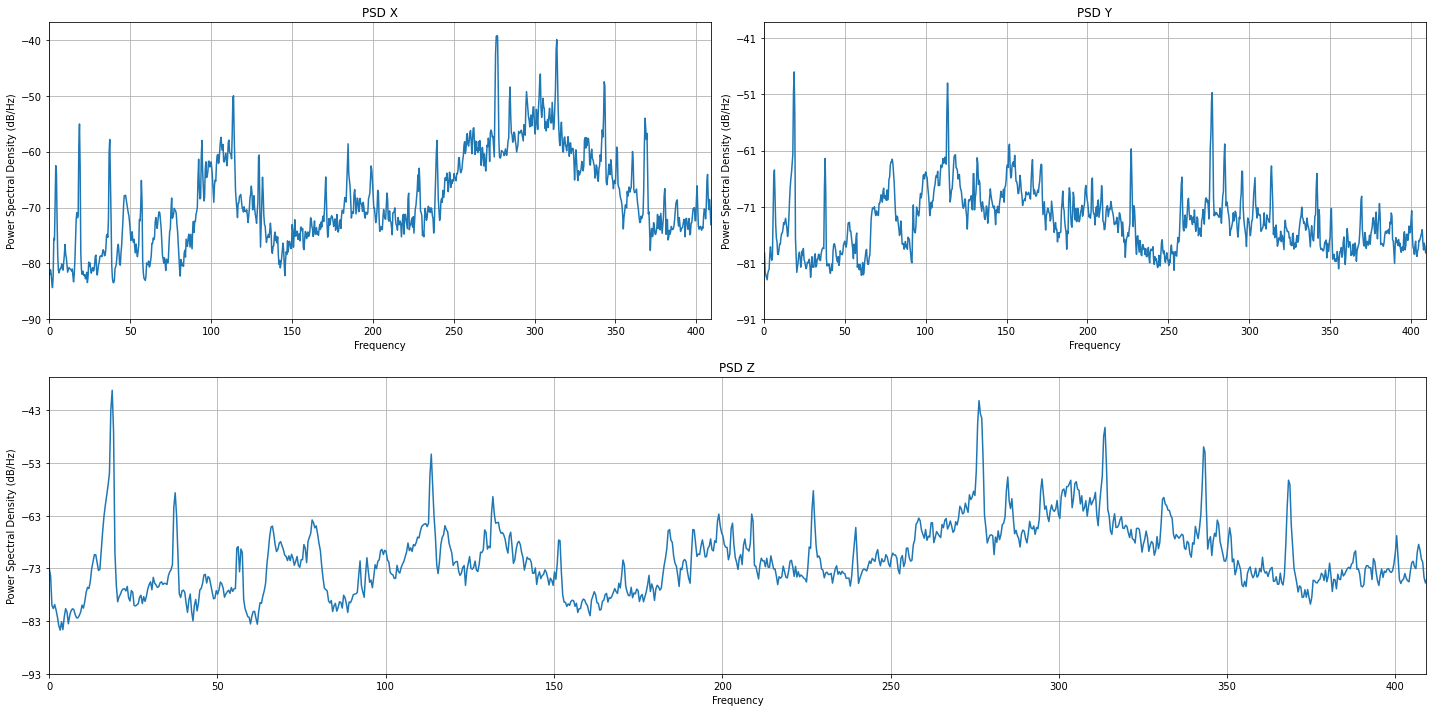

In [5]:
fmin = range.value[0]
fmax = range.value[1]
plt.rcParams["figure.figsize"] = (20, 10)
fig = plt.figure()
ax1 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), colspan=1)
ax2 = plt.subplot2grid(shape=(2, 2), loc=(0, 1), colspan=1)
ax3 = plt.subplot2grid(shape=(2, 2), loc=(1, 0), colspan=2)
ax1.psd(x, 16384, sr)
ax1.set_xlim([fmin,fmax])
ax1.set_title('PSD X')
ax2.psd(y, 16384, sr)
ax2.set_xlim([fmin,fmax])
ax2.set_title('PSD Y')
ax3.psd(z, 16384, sr)
ax3.set_xlim([fmin,fmax])
ax3.set_title('PSD Z')

plt.tight_layout()
plt.show()
